# CYPLAN101 Fall 2025 - Lab 5: Census Data & Census API

## Learning Objectives:
* Access and retrieve data from the US Census API using the census python library
* Query the US Census API for data pertaining to specific variables and geographies
* Explore a supplementary dataset independently
* Analyze dataset contents to identify data quality issues
* Apply pandas to wrangle and clean dirty data
* Integrate multiple datasets by merching the supplementary data with census data
* Create basic visualizations using matplotlib and seaborn
---

## Part I. Access, Retrieve, and Clean US Census Data


### Step 1: Load in large census dataset (all tracts in Alameda County) using the census package

```
# Open the Terminal in the bottom lefthand corner of your screen.
# Run the following command by typing it in manually (case sensitive!)

pip install census
```

> **Tip:** You will need to use your Census API key from Lab #4 in order to complete this exercise.  If you did not generate this key, you will need to generate it by following the steps outlined in Lab #4. Once you have your key, store it securely as an environment variable.

Base syntax for census data and conversion to pandas dataframe retrieval is as follows:

```
  popData = [API KEY VARIABLE].[DATASET REF e.g., sf1].[GEOGRAPHY](
      fields=[''],
      state_fips='',
      county_fips='',
      tract='',
      year=
  )

dfPop = pd.DataFrame(popData)
print(dfPop)
```
You must use the **census** package documentation as well as the **us** [package documentation](https://pypi.org/project/us/) to define the appropriate arguments for the function.


### Step 2: Retrieve population and household income for all census tracts in Alameda County for the year 2021.


In [ ]:
from census import Census
from us import states
import os
import pandas as pd

# Your API key insert code here:
from google.colab import userdata
censusAPIKey = Census(
    os.getenv(
        userdata.get('censusAPIKey')
        ))

##❗️ Try it Out ❗️
Now its your turn.  Using the template code provided retrieve data for the Alameda County census tracts.


In [ ]:
# From Lab 4

state_code = "06"
county_code = "001"
tract_code = "423602"

In [ ]:
# Get data for Alameda County census tracts
# Alameda County FIPS code is 001
alamedaCountyTracts = censusAPIKey.acs5.state_county_tract(
    fields=('NAME', 'B01003_001E', 'B19013_001E'),
    state_fips=state_code,
    county_fips='001',
    tract='*',
    year=2021
)

# Use the space below to convert alamedaCountyTracts to a DataFrame
alamedaDataframe = pd.DataFrame(alamedaCountyTracts)

# Rename columns for clarity
alamedaDataframe = alamedaDataframe.rename(columns={
    'B01003_001E': 'population',
    'B19013_001E': 'median_household_income'
})

# Display first five rows
print(alamedaDataframe.head())

                                            NAME  population  \
0  Census Tract 4001, Alameda County, California      3324.0   
1  Census Tract 4002, Alameda County, California      2038.0   
2  Census Tract 4003, Alameda County, California      5449.0   
3  Census Tract 4004, Alameda County, California      4384.0   
4  Census Tract 4005, Alameda County, California      4048.0   

   median_household_income state county   tract  
0                 224821.0    06    001  400100  
1                 201154.0    06    001  400200  
2                 127333.0    06    001  400300  
3                 146265.0    06    001  400400  
4                 101597.0    06    001  400500  


**Explore the dataset**

After loading data, it is important to understand its structure and contents. This helps identify data quality issues, understand variable distributions, and plan next steps.  The next three steps you will apply a series of functions to do this.

### Step 3: Display the first five rows using the `head()` function/method (check).

> `head()` returns the first 5 rows by default. Useful for quickly seeing what your data looks like and verifying it loaded correctly. You can pass a number like `df.head(10)` to see more rows.



### Step 4: Retrieve the dimensions of the dataset using the `.shape()`

> `.shape` returns a tuple (rows, columns). Tells you the size of your dataset. For example, (361, 5) means 361 census tracts with 5 columns of data.



### Step 5: Get a summary of the dataset with descriptive statistics.

> `.describe()` generates descriptive statistics including count, mean, standard deviation, min, max, and quartiles for all numeric columns. Helps identify outliers, understand data ranges, and spot potential data quality issues.

##❗️ Try it Out ❗️

In [ ]:
# Use this space to apply the .head() function
display(alamedaDataframe.head())

# Use this space to apply the .shape() function
print(f"There shape of this table is: {alamedaDataframe.shape}")

# Use this space to apply the .describe() function
display(alamedaDataframe.describe())


,NAME,population,median_household_income,state,county,tract
0,"Census Tract 4001, Alameda County, California",3324.0,224821.0,06,001,400100
1,"Census Tract 4002, Alameda County, California",2038.0,201154.0,06,001,400200
2,"Census Tract 4003, Alameda County, California",5449.0,127333.0,06,001,400300
3,"Census Tract 4004, Alameda County, California",4384.0,146265.0,06,001,400400
4,"Census Tract 4005, Alameda County, California",4048.0,101597.0,06,001,400500


There shape of this table is: (379, 6)


,population,median_household_income
count,379.000000,3.790000e+02
mean,4414.598945,-8.678235e+06
std,1760.944572,7.618005e+07
min,0.000000,-6.666667e+08
25%,3214.000000,8.129100e+04
50%,4195.000000,1.069050e+05
75%,5442.000000,1.478840e+05
max,12700.000000,2.500010e+05


### Step 6: Subset your data

You have a list of tracts in Berkeley.  Using the `isin` method, subset the Alameda County census tract dataframe to create a separate dataframe with only those Berkeley tracts.

```
berkeley_tracts = ['4201', '4202', '4203', '4204', '4205', '4206', '4207', '4208', '4209',
                   '4210', '4211', '4212', '4213', '4214', '4215', '4216', '4217', '4218',
                   '4219', '4220', '4221', '4222', '4223', '4224', '4225', '4226', '4227']
```

> `.isin()` is a pandas method that checks if each value in a Series (column) is contained in a provided list, returning a boolean mask. For example:
```
df[df['series1'].isin('series2')]

```


##❗️ Try it Out ❗️
Use the `isin` method to retrive the Berkeley tracts from the Alameda County tracts.

In [ ]:
# Your code here

berkeley_tracts = ['4201', '4202', '4203', '4204', '4205', '4206', '4207', '4208', '4209',
                   '4210', '4211', '4212', '4213', '4214', '4215', '4216', '4217', '4218',
                   '4219', '4220', '4221', '4222', '4223', '4224', '4225', '4226', '4227']

berkeley_data = alamedaDataframe[alamedaDataframe['tract'].str[:4].isin(berkeley_tracts)]
display(berkeley_data)

,NAME,population,median_household_income,state,county,tract
113,"Census Tract 4201, Alameda County, California",2598.0,168566.0,06,001,420100
114,"Census Tract 4202, Alameda County, California",3275.0,115000.0,06,001,420200
115,"Census Tract 4203.01, Alameda County, California",2730.0,106905.0,06,001,420301
116,"Census Tract 4203.02, Alameda County, California",2493.0,99250.0,06,001,420302
117,"Census Tract 4204.01, Alameda County, California",1130.0,64861.0,06,001,420401
118,"Census Tract 4204.02, Alameda County, California",1746.0,63281.0,06,001,420402
119,"Census Tract 4205, Alameda County, California",2429.0,112125.0,06,001,420500
120,"Census Tract 4206, Alameda County, California",3557.0,164688.0,06,001,420600
121,"Census Tract 4211, Alameda County, California",2071.0,217399.0,06,001,421100
122,"Census Tract 4212, Alameda County, California",3553.0,250001.0,06,001,421200


---

## Part II. Exploring, Cleaning, and Joining Data
In this Part of the Lab exercise, you will work with a generated survey dataset containing fictitious responses to a survey to residents of Berkeley's census tracts about restaurant options, third spaces, and dining out.  The five steps of this section require you to explore and clean this input dataset which contains a few common and highly problematic inconsistencies.

Before diving into the first step, you will need to load in your data.  To do this, you must **navigate to bCourses and download the dataset, then upload it into your working directory**.  When you have completed this step, **review then run** the code cell below to load in your data.

In [ ]:
import pandas as pd

berkeleySurveyData = pd.read_csv('/content/berkeley_survey_data.csv')

print(berkeleySurveyData.head())

  respondent_id  tract_fid  food_options_rating         frequency_eating_out  \
0      RESP0001   420700.0                    2  more than five times a week   
1      RESP0002   420400.0                    2  more than five times a week   
2      RESP0003   421300.0                    4             2-5 times a week   
3      RESP0004   421500.0                    4             2-5 times a week   
4      RESP0005   421100.0                    1                  once weekly   

   need_third_place_rating submission_date submission_time  
0                        2      2025-09-22        16:39:00  
1                        3      2025-09-16        12:00:00  
2                        4      2025-09-07        14:04:00  
3                        2      2025-09-29        13:28:00  
4                        1      2025-09-10        14:02:00  


### Step 1: Check for missing values (null/NaN)
First, we will check for missing values in the data.  This can be done using `.isnull()` which returns a **boolean** DataFrame (True for missing values).

  > Booleans are True/False values that pandas uses to create masks for filtering data. For example, when you compare a column to a value (like `df['rating'] > 3`), you get a Series of True/False that acts as a filter to select only matching rows. This vectorized approach is much faster than loops because it operates on entire columns at once using optimized code, and you can combine multiple conditions using `&` (and), `|` (or), and `~` (not) operators.

##❗️ Try it Out ❗️
Once identified, its important to identify a method for handling the missing values in a dataset.  Using the code cell below, remove the unwanted NaN values.

To do this, you can try using `dropna()` which removes any row containing at least one missing value. Here is some template code you should adapt in the code cell below:

```
dfClean = df.dropna()
```

> Hint: You can use `subset=['tract_fid']` to only drop rows with missing values in specific columns.



In [ ]:
# Use this space to check for rows containing missing values in your code across each dataframe column
display(berkeleySurveyData.isnull().sum())

# Use this space to remove the missing values in the DataFrame
berkeleySurveyData = berkeleySurveyData.dropna()
# Use this space to confirm that the missing values were removed
print("Updated Berkeley Survey Data")
display(berkeleySurveyData.isnull().sum())


,0
respondent_id,0
tract_fid,10
food_options_rating,0
frequency_eating_out,0
need_third_place_rating,0
submission_date,0
submission_time,0


Updated Berkeley Survey Data


,0
respondent_id,0
tract_fid,0
food_options_rating,0
frequency_eating_out,0
need_third_place_rating,0
submission_date,0
submission_time,0


### Step 2: Perform String Concatenation using Vectorization

For some reason the date and time columns have been divided into two.  Often, they are not formatted in a way that allows for easy conversion into the datetime type, but in this case we are lucky. In this step, we aim to  combine the date and time strings in each row so that they follow the date/time format using **vectorization**.

> This is **vectorized**, meaning it operates on entire columns at once.


##❗️ Try it Out ❗️

In [ ]:
# Use this space to concatenate the date and time columns into a single new column
berkeleySurveyData['submission_date'] = berkeleySurveyData['submission_date'] + ' ' + berkeleySurveyData['submission_time']
berkeleySurveyData = berkeleySurveyData.drop(['submission_time'], axis =1 )
berkeleySurveyData.head()

,respondent_id,tract_fid,food_options_rating,frequency_eating_out,need_third_place_rating,submission_date
0,RESP0001,420700.0,2,more than five times a week,2,2025-09-22 16:39:00
1,RESP0002,420400.0,2,more than five times a week,3,2025-09-16 12:00:00
2,RESP0003,421300.0,4,2-5 times a week,4,2025-09-07 14:04:00
3,RESP0004,421500.0,4,2-5 times a week,2,2025-09-29 13:28:00
4,RESP0005,421100.0,1,once weekly,1,2025-09-10 14:02:00


### Step 3: Convert date/time column

Now that the appropriate data has been combined into a single column, we will need to convert the type from `object` to datetime.  To do this, we will use `pd.to_datetime()` which converts the combined string to datetime format.

##❗️ Try it Out ❗️

Using the code cell below, use  to_datetime() to convert the combined string to datetime format.

In [ ]:
# Use this space to convert the date/time column into date/time format
berkeleySurveyData['submission_date'] = pd.to_datetime(berkeleySurveyData['submission_date'])

# Use this space to verify that the datatype of the date/time column is correct.

berkeleySurveyData.head()

,respondent_id,tract_fid,food_options_rating,frequency_eating_out,need_third_place_rating,submission_date
0,RESP0001,420700.0,2,more than five times a week,2,2025-09-22 16:39:00
1,RESP0002,420400.0,2,more than five times a week,3,2025-09-16 12:00:00
2,RESP0003,421300.0,4,2-5 times a week,4,2025-09-07 14:04:00
3,RESP0004,421500.0,4,2-5 times a week,2,2025-09-29 13:28:00
4,RESP0005,421100.0,1,once weekly,1,2025-09-10 14:02:00


### Step 4: Fix text strings

When you performed an initial examination of the dataset, you noticed that the `tract_FID` column was erroneously assigned a `float` type.  This happened because of the missing values and can be easily rectified by applying another vectorized function , `.astype` to convert all values in the column to strings.  

##❗️ Try it Out ❗️

Using the code cell below, apply .`astype` to convert the incorrectly formatted cells to strings.

In [ ]:
# Use this space to print the tract FID type
display(berkeleySurveyData['tract_fid'])

# Use this space to convert the tract FID into the correct format (you may need to apply astype twice!)
berkeleySurveyData['tract_fid'] = berkeleySurveyData['tract_fid'].astype(int).astype(str)

# Use this space to print the head of the tract_fid column and verify that the correct data type (String!) was applied.
display(berkeleySurveyData['tract_fid'])


,tract_fid
0,420700.0
1,420400.0
2,421300.0
3,421500.0
4,421100.0
...,...
95,421300.0
96,421500.0
97,420200.0
98,421000.0


,tract_fid
0,420700
1,420400
2,421300
3,421500
4,421100
...,...
95,421300
96,421500
97,420200
98,421000


### Step 5: Get counts of categorical variable
Its time to start thinking about summarizing the data.  We'd like to be able to see in which census tracts' residents rate as having the best quality restaurants.  

We can do this by creating a new series containing the averages of responses to this question for the corresponding column in the data.  

##❗️ Try it Out ❗️
Edit the template code below to retrieve the counts for the appropriate column in the survey dataset.

```
# Get counts by census tract
tract_counts = df.groupby('___')['___'].reset_index()
tract_counts.columns = ['tract_fid', 'response_average']
```

> **Hint:** .groupby('tract_fid') groups rows by census tract. ['food_options_rating'].mean() calculates the average rating for each tract. .reset_index() converts to a DataFrame with tract_fid and average as separate columns.

In [ ]:
# # Edit the code below to group the data by census tract
groupedData = berkeleySurveyData.groupby('tract_fid')

# # Edit the code below to select the column to count and apply the count method
tractAvg = groupedData['food_options_rating'].mean()

# # Edit the code below to convert to DataFrame with proper column structure
tractAvg = tractAvg.reset_index()

# # Edit the code below to rename columns in the new DataFrame for clarity
tractAvg.columns = ['tract_fid', 'response_count']
display(tractAvg)


,tract_fid,response_count
0,420100,3.666667
1,420200,2.750000
2,420300,2.833333
3,420400,2.500000
4,420500,2.285714
5,420600,2.833333
6,420700,3.714286
7,420800,3.428571
8,420900,3.600000
9,421000,2.857143


### Step 6: Merge in Your Census Tract Data
Let's create a single dataframe containing all of the data required in order to produce two basic plots:

1. A plot of Berkeley's tracts and their corresponding population
2. A scatter plot of Berkeley's median household income and the average food options ratings.

##❗️ Try it Out ❗️

`.merge()` joins the average ratings with census demographics.  You can use the below template code to help structure your code:

```
result_df = left_df.merge(
    right_df[['column1', 'column2', 'column3']],
    left_on='left_column_name',
    right_on='right_column_name',
    how='left'
)
```
Remove the na values from mismatched or nonexistant census tracts

In [ ]:
# Use this space to run a merge between tractCounts and alamedaDataFrame DataFrames based on FID
# Use the syntax provided above.
tractCounts = alamedaDataframe.merge(
    tractAvg[['tract_fid', 'response_count']],
    left_on='tract',
    right_on='tract_fid',
    how='left'
)

# Use this space to remove any row containing at least one NaN value.
tractCounts = tractCounts.dropna().drop(columns=['tract_fid'])
display(tractCounts)


,NAME,population,median_household_income,state,county,tract,response_count
113,"Census Tract 4201, Alameda County, California",2598.0,168566.0,06,001,420100,3.666667
114,"Census Tract 4202, Alameda County, California",3275.0,115000.0,06,001,420200,2.750000
119,"Census Tract 4205, Alameda County, California",2429.0,112125.0,06,001,420500,2.285714
120,"Census Tract 4206, Alameda County, California",3557.0,164688.0,06,001,420600,2.833333
121,"Census Tract 4211, Alameda County, California",2071.0,217399.0,06,001,421100,3.000000
122,"Census Tract 4212, Alameda County, California",3553.0,250001.0,06,001,421200,2.833333
123,"Census Tract 4213, Alameda County, California",3937.0,142109.0,06,001,421300,3.600000
124,"Census Tract 4214, Alameda County, California",1715.0,195673.0,06,001,421400,2.571429
125,"Census Tract 4215, Alameda County, California",3920.0,187250.0,06,001,421500,3.000000


---
## Part III. Create Two Basic Plots

Now we will apply the **matplotlib** and **Seaborn** mapping libraries to produce two basic plots of your data.

### Step 1: Plot Top 10 Most Populous Tracts Using matplotlib
Create a bar plot of Berkeley's tracts and their corresponding population.  We will do this using **matplotlib**, which is a library for creating static, animated, and interactive visualizations in Python.  

matplotlib is one of the most commonly used plotting libraries. Each plot in matplotlib includes some basic syntax.  To create a basic plot you must initialize the plot and specify the data to be placed on the figure axes.  The base syntax for this is represented in the example below from the matplotlib [documentation](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start):
```
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure (sometimes optional).
```

##❗️ Try it Out ❗️
In the example above, a simple line graph is produced from the input data.  It is possible to produce different types of graphs--including graphs of categorical variables like the one we would like to produce from the **top 10 most populous census tracts**.  

Adapt the template code below to display the top 10 most populous census tracts in Berkeley.

```
fig, ax = plt.subplots( layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

# This just creates random heights for the bars in each category.  You have your own input data that can be used here.
ax.bar(categories, np.random.rand(len(categories)))
```

> **Hint:** You can use the `.sort_values` method to sort the top 10 values, then use indexing to parse out the top 10 most populous tracts.  **Example Code:**

```
# This code sorts the DataFrame apt_df_nodup by the date_new column in descending order (newest dates first) and then displays the first 5 rows of the sorted result.

apt_df_nodup = apt_df_nodup.sort_values(by='date_new', ascending=False)
apt_df_nodup.head()
```


In [ ]:
tractCounts.head()

,NAME,population,median_household_income,state,county,tract,response_count
113,"Census Tract 4201, Alameda County, California",2598.0,168566.0,06,001,420100,3.666667
114,"Census Tract 4202, Alameda County, California",3275.0,115000.0,06,001,420200,2.750000
119,"Census Tract 4205, Alameda County, California",2429.0,112125.0,06,001,420500,2.285714
120,"Census Tract 4206, Alameda County, California",3557.0,164688.0,06,001,420600,2.833333
121,"Census Tract 4211, Alameda County, California",2071.0,217399.0,06,001,421100,3.000000


In [ ]:
sorted = tractCounts.sort_values(by='population')

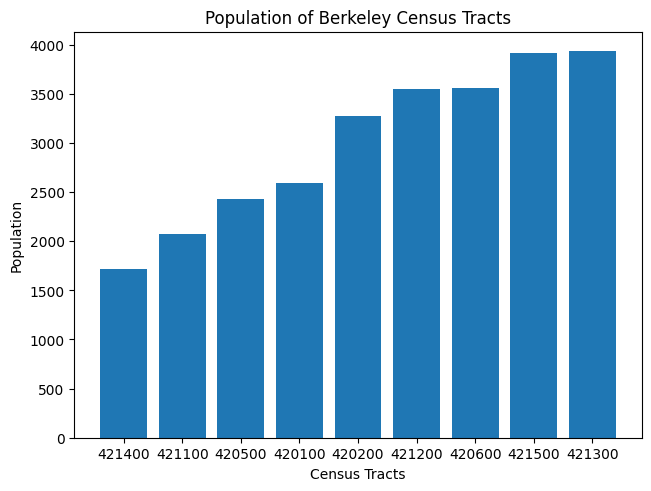

In [ ]:
import matplotlib.pyplot as plt

# Use this space to sort and filter your DataFrame.
sorted = tractCounts.sort_values(by='population')
categories = sorted['tract'].unique()

# Use this space to create your plo
fig, ax = plt.subplots( layout='constrained')

# This just creates random heights for the bars in each category.  You have your own input data that can be used here.
ax.bar(categories, sorted['population'])
plt.xlabel('Census Tracts')
plt.ylabel('Population')
plt.title('Population of Berkeley Census Tracts')
plt.show()

### Step 2: Create a scatter plot using seaborn
Create a scatter plot of Berkeley's median household income and the average food options ratings using **Seaborn**, a Python data visualization library based on matplotlib.

Plots in Seaborn also follow a standard format and contain a few base elements.  The base syntax for a Seaborn plot is represented in the example code below:

```
# Create the plot
sns.scatterplot(data=df, x='column_name_x', y='column_name_y')

# Add labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot Title')

# Display the plot
plt.show()
```

##❗️ Try it Out ❗️
Using the template code below, create a scatter plot with income on the x axis and average rating on the y axis.

```
sns.scatterplot(data=df, x='income', y='rating')
plt.show()
```

> **Tip:** Try playing around with common arguments for `scatterplot` like `hue`, and `size`.  Add labels and a title to your graph by applying the base plotting code provided in the "Step 2" subsection.

In [ ]:
tractCounts.head()

,NAME,population,median_household_income,state,county,tract,response_count
113,"Census Tract 4201, Alameda County, California",2598.0,168566.0,06,001,420100,3.666667
114,"Census Tract 4202, Alameda County, California",3275.0,115000.0,06,001,420200,2.750000
119,"Census Tract 4205, Alameda County, California",2429.0,112125.0,06,001,420500,2.285714
120,"Census Tract 4206, Alameda County, California",3557.0,164688.0,06,001,420600,2.833333
121,"Census Tract 4211, Alameda County, California",2071.0,217399.0,06,001,421100,3.000000


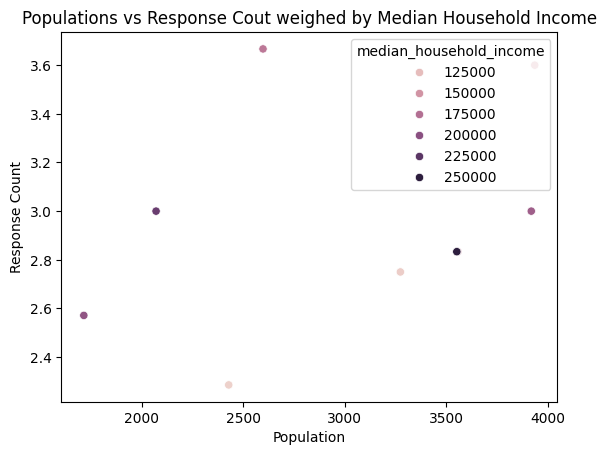

In [ ]:
import seaborn as sns
# Your code here
sns.scatterplot(data = tractCounts,
                x='population',
                y='response_count',
                hue='median_household_income')

# Create scatter plot
plt.xlabel('Population')
plt.ylabel('Response Count')
plt.title('Populations vs Response Cout weighed by Median Household Income')

# Display the plot
plt.show()



# Important Submission Instructions

Submit your work at the end of the class period regardless of whether or not it is complete through Google Assignments.  

Ideally you will have completed up until Part II and will have begun Part III.  Continue working on this until end-of-week.  Submissions received after Friday will not be accepted for credit.